<a href="https://colab.research.google.com/github/Rohan-1103/Data-Science/blob/main/bagging_learning_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv('iris.csv')

In [30]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
df = df.iloc[:,1:]

In [32]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
encoder = LabelEncoder()

In [35]:
df['Species'] = encoder.fit_transform(df['Species'])

In [36]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [38]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

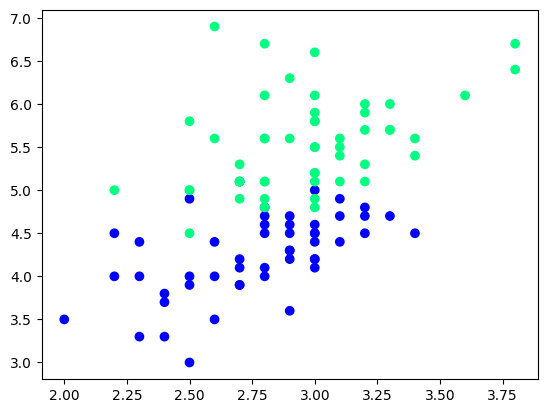

In [40]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [41]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
82,2.7,3.9,1
71,2.8,4.0,1
53,2.3,4.0,1
66,3.0,4.5,1
83,2.7,5.1,1
92,2.6,4.0,1
80,2.4,3.8,1
60,2.0,3.5,1
78,2.9,4.5,1
101,2.7,5.1,2


In [42]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [43]:
df_train

,SepalWidthCm,PetalLengthCm,Species
108,2.5,5.8,2
105,3.0,6.6,2
55,2.8,4.5,1
94,2.7,4.2,1
65,3.1,4.4,1
97,2.9,4.3,1
132,2.8,5.6,2
59,2.7,3.9,1
116,3.0,5.5,2
93,2.3,3.3,1


In [44]:
df_val

,SepalWidthCm,PetalLengthCm,Species
57,2.4,3.3,1
52,3.1,4.9,1
90,2.6,4.4,1
123,2.7,4.9,2
70,3.2,4.8,1


In [45]:
df_test

,SepalWidthCm,PetalLengthCm,Species
125,3.2,6.0,2
122,2.8,6.7,2
137,3.1,5.5,2
141,3.1,5.1,2
143,3.2,5.9,2


In [46]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [47]:
y_test

array([1, 1, 1, 2, 1])

# Case 1 - Bagging

In [48]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
93,2.3,3.3,1
97,2.9,4.3,1
116,3.0,5.5,2
55,2.8,4.5,1
132,2.8,5.6,2
97,2.9,4.3,1
108,2.5,5.8,2
132,2.8,5.6,2


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [50]:
dt_bag1 = DecisionTreeClassifier()

In [51]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))


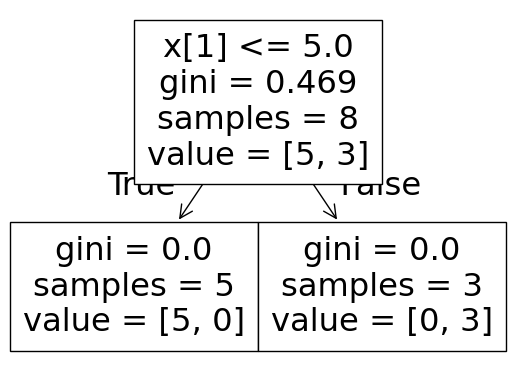

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


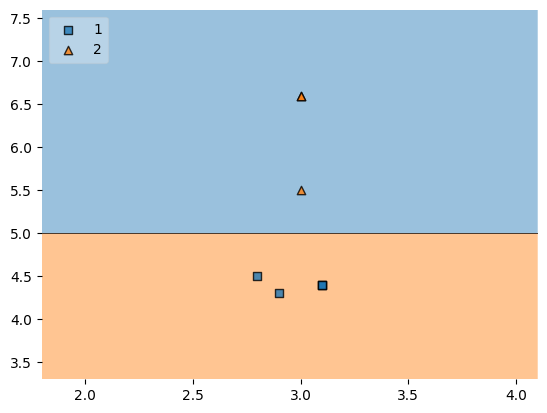

In [52]:
dt_bag1 = DecisionTreeClassifier()
# Data for Tree 1
df_bag_1 = df_train.sample(8,replace=True)
X_1 = df_bag_1.iloc[:,0:2]
y_1 = df_bag_1.iloc[:,-1]
evaluate(dt_bag1,X_1,y_1)

In [53]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
105,3.0,6.6,2
105,3.0,6.6,2
94,2.7,4.2,1
93,2.3,3.3,1
97,2.9,4.3,1
55,2.8,4.5,1
93,2.3,3.3,1
97,2.9,4.3,1


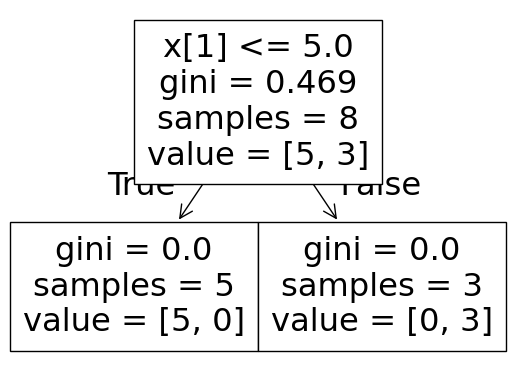

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


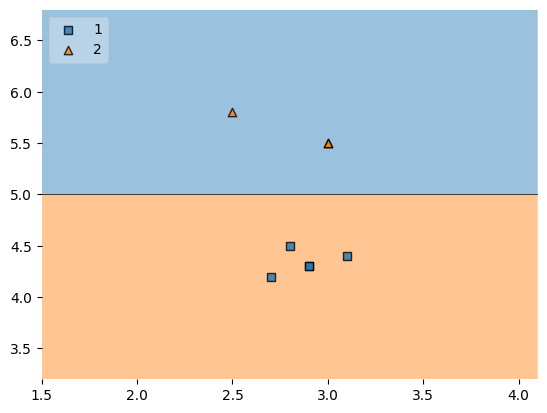

In [54]:
dt_bag2 = DecisionTreeClassifier()
# Data for Tree 2
df_bag_2 = df_train.sample(8,replace=True)
X_2 = df_bag_2.iloc[:,0:2]
y_2 = df_bag_2.iloc[:,-1]
evaluate(dt_bag2,X_2,y_2)

In [55]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
132,2.8,5.6,2
94,2.7,4.2,1
116,3.0,5.5,2
97,2.9,4.3,1
108,2.5,5.8,2
97,2.9,4.3,1
97,2.9,4.3,1
94,2.7,4.2,1


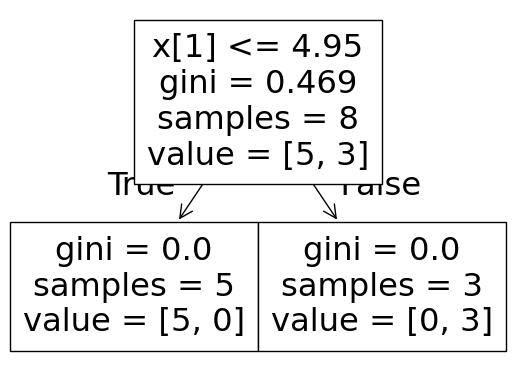

0.8


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


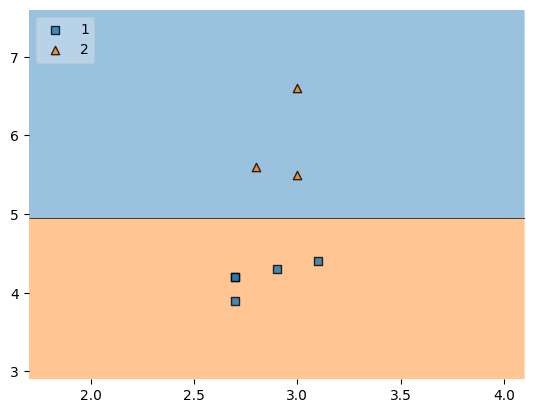

In [56]:
dt_bag3 = DecisionTreeClassifier()
# Data for Tree 3
df_bag_3 = df_train.sample(8,replace=True)
X_3 = df_bag_3.iloc[:,0:2]
y_3 = df_bag_3.iloc[:,-1]
evaluate(dt_bag3,X_3,y_3)

## Predict

In [57]:
df_test

,SepalWidthCm,PetalLengthCm,Species
125,3.2,6.0,2
122,2.8,6.7,2
137,3.1,5.5,2
141,3.1,5.1,2
143,3.2,5.9,2


In [58]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [2]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [59]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
108,2.5,5.8,2
105,3.0,6.6,2
55,2.8,4.5,1
94,2.7,4.2,1
65,3.1,4.4,1
97,2.9,4.3,1
132,2.8,5.6,2
59,2.7,3.9,1
116,3.0,5.5,2
93,2.3,3.3,1


In [60]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
116,3.0,5.5,2
59,2.7,3.9,1
97,2.9,4.3,1
65,3.1,4.4,1
94,2.7,4.2,1
132,2.8,5.6,2
55,2.8,4.5,1
105,3.0,6.6,2


# Random Subspaces

In [61]:
df1 = pd.read_csv('iris.csv')
df1 = df1.sample(10)

In [62]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
136,137,6.3,3.4,5.6,2.4,Iris-virginica
40,41,5.0,3.5,1.3,0.3,Iris-setosa
48,49,5.3,3.7,1.5,0.2,Iris-setosa
145,146,6.7,3.0,5.2,2.3,Iris-virginica
24,25,4.8,3.4,1.9,0.2,Iris-setosa
121,122,5.6,2.8,4.9,2.0,Iris-virginica
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
58,59,6.6,2.9,4.6,1.3,Iris-versicolor


In [63]:
df1.sample(2,replace=True,axis=1)

,Species,Id
82,Iris-versicolor,83
136,Iris-virginica,137
40,Iris-setosa,41
48,Iris-setosa,49
145,Iris-virginica,146
24,Iris-setosa,25
121,Iris-virginica,122
93,Iris-versicolor,94
50,Iris-versicolor,51
58,Iris-versicolor,59


# Random Patches

In [64]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
136,137,6.3,3.4,5.6,2.4,Iris-virginica
40,41,5.0,3.5,1.3,0.3,Iris-setosa
48,49,5.3,3.7,1.5,0.2,Iris-setosa
145,146,6.7,3.0,5.2,2.3,Iris-virginica
24,25,4.8,3.4,1.9,0.2,Iris-setosa
121,122,5.6,2.8,4.9,2.0,Iris-virginica
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
58,59,6.6,2.9,4.6,1.3,Iris-versicolor


In [65]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Id,Species
82,83,Iris-versicolor
48,49,Iris-setosa
24,25,Iris-setosa
121,122,Iris-virginica
50,51,Iris-versicolor
136,137,Iris-virginica
82,83,Iris-versicolor
82,83,Iris-versicolor
